# <center> <span style="color:purple"> Breast cancer prediction </span>
### <span style="color:darkblue"> Author </span> 
<span style="color:black"> Leidy Alfonso, lpalfonsoa@gmail.com </span> 

### <span style="color:darkblue"> Objetive:  </span>  
+ Understand the Dataset & cleanup (if required). 

+ Utilize dimensionality reduction and clustering algorithms to categorize breast masses as malignant or benign (in progress)

+ Develop classification models that can accurately predict whether a cancer type is malignant or benign.

+ Compare the evaluation metrics of different classification algorithms to determine which ones perform best in this context.

<span style="color:darkblue"> Description:  </span>  
<p style="text-align: justify;">  According to the World Health Organization (WHO), breast cancer is the most common cancer globally, with 2.3 million women diagnosed and 685,000 deaths from the disease in 2020. As of the end of that year, there were 7.8 million women worldwide who had been diagnosed with breast cancer in the previous five years and were still alive. 
With the increasing prevalence of breast cancer, understanding the factors that contribute to its development and progression, as well as developing effective prevention and treatment strategies, is vital. Early detection is also critical in improving the chances of successful treatment and recovery. Data analysis is a valuable tool for studying breast cancer, as it allows researchers to identify patterns and trends that can help improve our understanding of the disease being particularly valuable in predicting whether a breast tumor is benign or malignant. </p>

<p style="text-align: justify;"> After conducting preprocessing of the dataset to ensure its cleanliness and quality, as well as an exploratory analysis to gain a deeper understanding of its characteristics and underlying patterns, various classification algorithms were implemented to predict whether the cancer type is malignant or benign. By evaluating the performance of these algorithms on the preprocessed data, we have obtained insights into the efficacy of these models in accurately detecting malignancy. </p>


<span style="color:darkblue"> Acknowledgements:  </span>  
This dataset has been referred from Kaggle.


#### <span style="color:black"> Import libraries </span> 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

### Descriptive analysis
#### <span style="color:black"> Load data </span> 

In [31]:
#-------------------Exploring data set---------------
#----------Load data-----------
df = pd.read_csv("../Data_sets/BreastCancer.csv")
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))
print('Features:', df.columns)
df.head()

Rows: 569 Columns: 33
Features: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### <span style="color:black"> Understand and clean data </span> 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### <span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;">  The dataset includes a column with a data type of "object" which have cathegorical data and another column containing null values. It has also been determined that the ID column does not provide relevant information for the project's objectives. As a result, it has been decided to remove these columns from the dataset to improve the accuracy and relevance of data analysis and the diagnosis data is critical and will be preserved as the target variable. </p>
 
<p style="text-align: justify;">  In order to obtain better results in the predictive models to be implemented, the data will be scaled. Also, some variables will be plotted to visualize their frequency distribution. </p>

In [33]:
#---------- Preprocessing data-----------
data = df.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)
data_diag = df['diagnosis']
display(data.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
#Statistical description
statisc = data.describe()
print(statisc)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [35]:
scaler = StandardScaler()
data_new = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Number of benign and malignant cases:  Counter({'B': 357, 'M': 212})


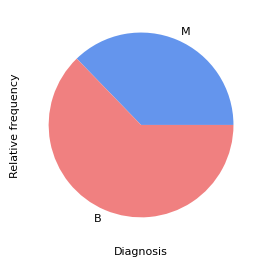

In [36]:
#Visualizing cathegorical data
ctr = Counter(data_diag)
print("Number of benign and malignant cases: ", ctr)
ctr_values = [value / data_diag.shape[0] for value in ctr.values()]
labels = ctr.keys()

plt.figure(figsize=(4, 3))
plt.pie(ctr_values, labels=labels, colors=['cornflowerblue', 'lightcoral'])
plt.ylabel("Relative frequency")
plt.xlabel("Diagnosis")

plt.show()

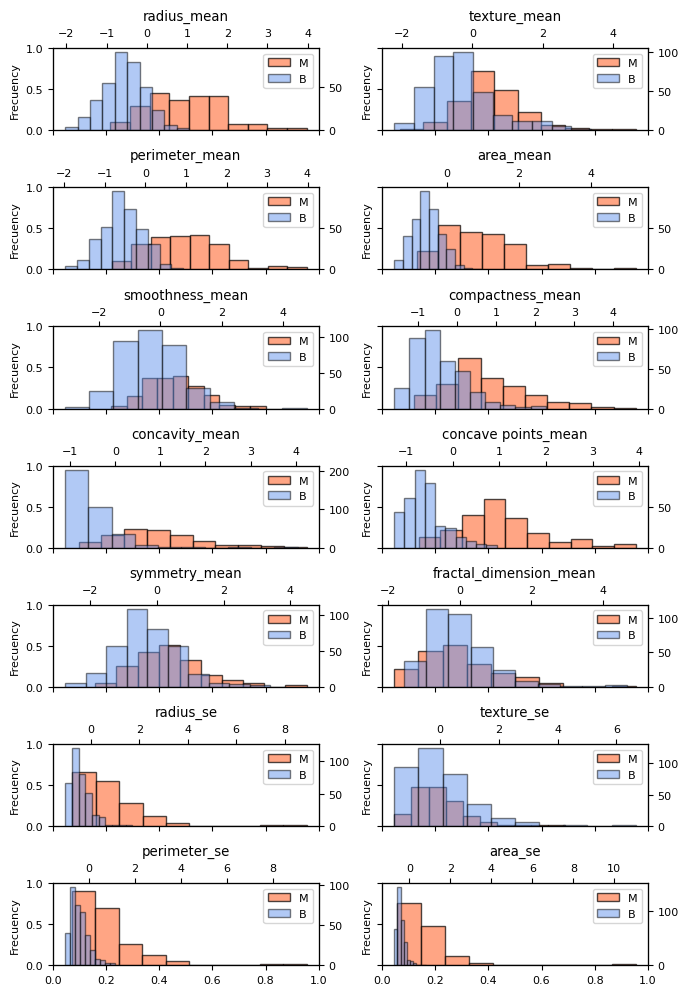

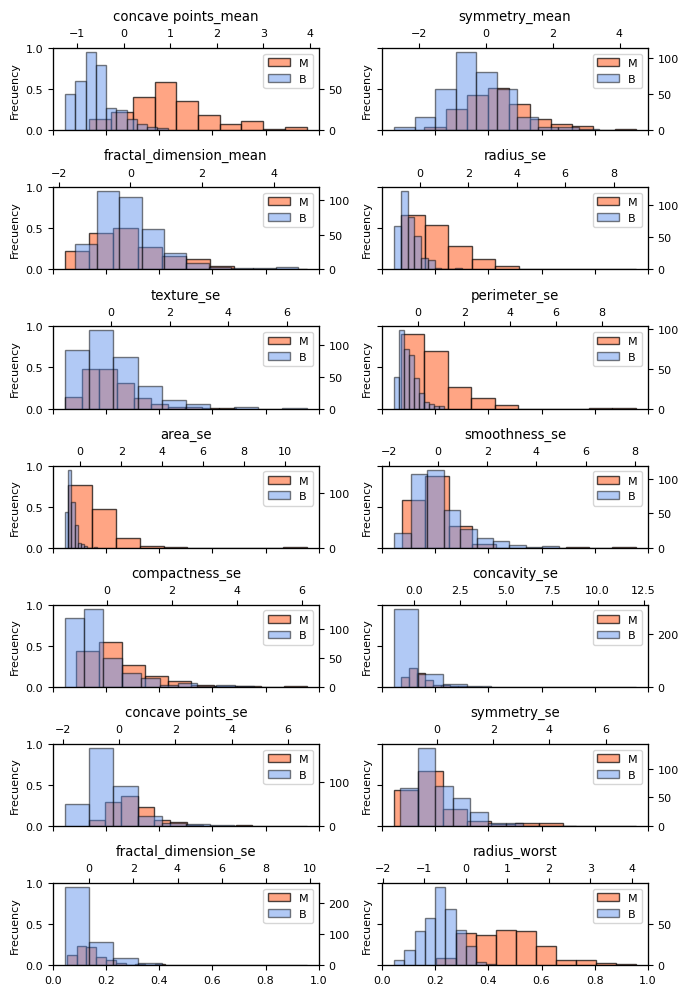

In [37]:
data_total = pd.concat([data_diag, data_new.iloc[:, 0:30]], axis=1)
data_M = data_total[data_total['diagnosis'] =='M']
data_B = data_total[data_total['diagnosis'] =='B']

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=2,nrows=7, sharex=True, sharey=True, figsize=(7,10))
lista= list(data_total.columns[1:])
for i, ax in enumerate(ax.flat):
  #if (i==6):
  ax.set_title(str(lista[i]))
  ax.set_ylabel('Frecuency')
  ax = ax.twinx().twiny()
  ax.hist(data_M[lista[i]], label='M', alpha=.7, edgecolor='black', color='coral')
  ax.hist(data_B[lista[i]], label="B", alpha=.5, edgecolor='black', color ='cornflowerblue')
  ax.legend()
fig.tight_layout()

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=2,nrows=7, sharex=True, sharey=True, figsize=(7,10))
lista= list(data_total.columns[1:])
for i, ax in enumerate(ax.flat):
  ax.set_title(str(lista[i+7]))
  ax.set_ylabel('Frecuency')
  ax = ax.twinx().twiny()
  ax.hist(data_M[lista[i+7]], label='M', alpha=.7, edgecolor='black', color='coral')
  ax.hist(data_B[lista[i+7]], label="B", alpha=.5, edgecolor='black', color ='cornflowerblue')
  ax.legend()
fig.tight_layout()

In [38]:
#graph_pp = sns.pairplot(data_total, hue = 'diagnosis', palette = 'magma')
#graph_pp.fig.suptitle('Breast cancer', y=1.01)

#### <span style="color:darkblue"> Observations: </span>  

<p style="text-align: justify;"> The dataset shows a 60-40 split between malignant and benign cases, with the former comprising the majority. The next step involves examining the descriptive statistics of the dataset. </p>
    
<p style="text-align: justify;">  Texture, simmetry, smoothness and fractal dimension have similar distribution for malign and benign case. On the other hand, features as radius, area and perimeter (all of them are related) for benign case have a shift towards values below the mean, so tumors that are malignant tend to have a positive correlation with larger values of these parameters. </p>

 In addition, correlation matrix will be studied to determinate posible lineal relation between each feature.

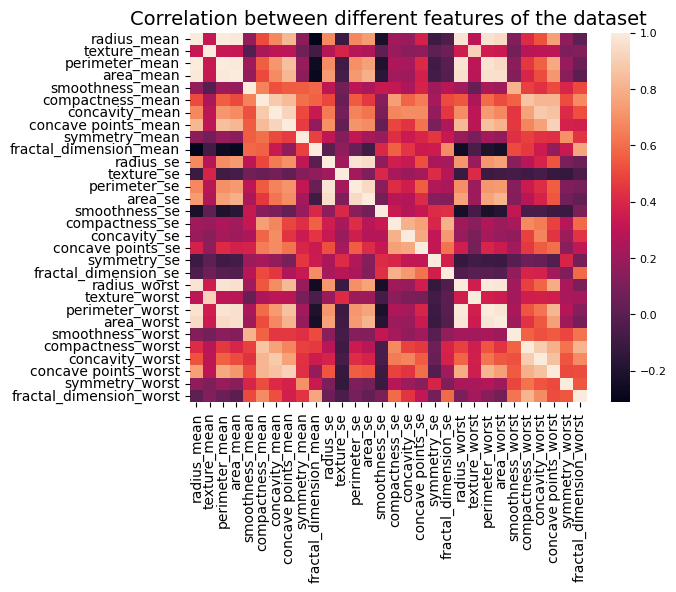

In [39]:
#Studying correlation
plt.title("Correlation between different features of the dataset", fontsize=14)
sns.heatmap(data_new.corr())
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

#### <span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;"> The correlation matrix suggests that variables such as area, perimeter and radius exhibit high correlation, which can be expected due to the mathematical relationship between area, perimeter, and radius. Although it might be beneficial to remove some of these variables, since this document does not have the guidance of a medical professional, all features will be retained. </p>


 <p style="text-align: justify;"> The original dataset contains around 30 features, which can make it difficult to visualize the data due to the high dimensionality. To address this, we will use Principal Component Analysis (PCA) and t-SNE to reduce the dimensionality of the data, allowing for a more manageable and informative analysis of the results. </p>

### <span style="color:black"> Dimensionality Reduction </span> 

 <p style="text-align: justify;"> In simpler terms, PCA is a method that identifies the most important features in the data and reduces the dimensionality while maintaining the key information. It is useful for visualizing the data, reducing noise, and improving analysis efficiency. On the other hand, t-SNE is a technique that focuses on preserving the local relationships between data points. It is especially effective in visualizing clusters or groups of similar data points and is commonly used for exploring data, identifying patterns, and gaining a deeper understanding of the data's structure. Unlike PCA, t-SNE does not provide a direct measure of the amount of information preserved after dimensionality reduction. </p>

 <p style="text-align: justify;"> It is important to note that clustering results can vary depending on the dimensionality reduction method used. Some methods may better capture certain patterns or structures in the data, which can influence the clustering models' ability to separate and group the data appropriately. Therefore, using multiple dimensionality reduction techniques and comparing the clustering results can provide a more robust evaluation and help better understand the data structure. </p>

#### <span style="color:black">  Principal Component Analysis  </span> 

(569, 2)

[0.44272026 0.18971182]


<Axes: >

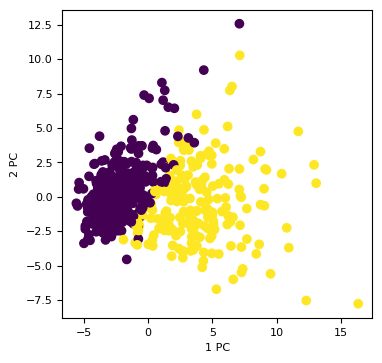

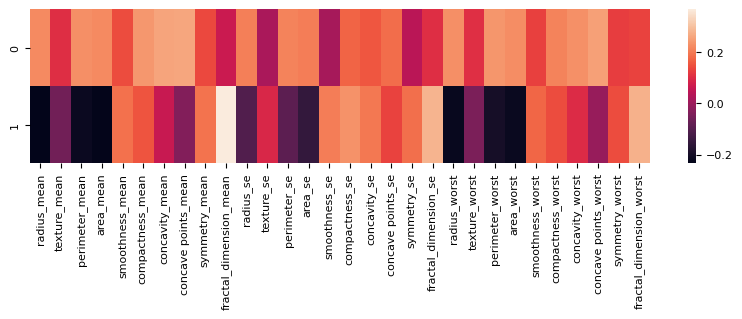

In [40]:
pca = PCA(n_components=2)
pca.fit(data_new)
data_pca = pca.transform(data_new)
display(data_pca.shape)
#plot PCA
target = [data_total['diagnosis'].map({'M':1, 'B':0})] #Creating target variable
plt.figure(figsize=(4, 4))
plt.scatter(data_pca[:, 0], data_pca[:,1], c=target)
plt.xlabel('1 PC')
plt.ylabel('2 PC')

print(pca.explained_variance_ratio_)
comp = pd.DataFrame(pca.components_, columns = data.columns)
plt.figure(figsize=(10, 2))
sns.heatmap(comp)

#### <span style="color:darkblue"> Observations: </span>  

<p style="text-align: justify;"> PCA method shows two clearly differentiated groups using only 2 main axes. Although, the variance is maximized along PC1 (explains 44% of the variance) and PC2 (explains 19% of the variance). Together, they explain 63% of the variance. On the other hand, the heatmap shows how each feature describe each one of the two principal componets. zero principal component is described mostly by concavity, concave points, perimeter, following by area and radius, showing a positive correlation. First principal component has large positive associations with fractal dimension, smoothness, compactness and simmetry while have a negative associations with radius, perimeter and area. It is important to mention that it is not surprising that the PCA does not describe the data as ideally, considering that we retain highly correlated features. 
</p>

#### <span style="color:black">  t-Distributed Stochastic Neighbor Embedding (t-SNE) </span> 

In [51]:
# Creating the high dimensional feature space X
X = data_new.values
data_diag = data_diag.map({'M':1, 'B':0})

tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.174126
[t-SNE] KL divergence after 2200 iterations: 0.864980


In [46]:
#functions for plotting
def ploting(result1, result2, name1):
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)

  ax1.scatter(Y[:,0],Y[:,1],  c=result1, cmap = "jet", edgecolor = "None", alpha=0.35)
  ax1.set_title(name1)
  ax1.set_xlabel('1 TSNE')
  ax1.set_ylabel('2 TSNE')

  ax2.scatter(Y[:,0],Y[:,1],  c = data_diag, cmap = "jet", edgecolor = "None", alpha=0.35)
  ax2.set_title('Actual clusters')
  ax2.set_xlabel('1 TSNE')
  ax2.set_ylabel('2 TSNE')

  ax3.scatter(data_pca[:,0],data_pca[:,1],  c=result2, cmap = "jet", edgecolor = "None", alpha=0.35)
  ax3.set_xlabel('1 PC')
  ax3.set_ylabel('2 PC')
  ax3.set_title(name1)

  ax4.scatter(data_pca[:,0],data_pca[:,1],  c=data_diag, cmap = "jet", edgecolor = "None", alpha=0.35)
  ax4.set_title('Actual clusters')
  ax4.set_xlabel('1 PC')
  ax4.set_ylabel('2 PC')

  # Adjust subplot spacing
  plt.subplots_adjust(hspace=0.6)

    
def metrics(resultX, resultPCA):
    # Calculate the silhouette scores
    silhouette = silhouette_score(X, resultX)
    silhouette_pca = silhouette_score(data_pca, resultPCA)

    # Print the silhouette scores
    print('Silhouette score (TSNE data):', silhouette)
    print('Silhouette score (PCA data):', silhouette_pca)

    # Compare to ground truth or labeled data
    ground_truth = data_diag.values

    ari = adjusted_rand_score(ground_truth, resultX)
    accuracy = accuracy_score(ground_truth, resultX)

    print('Adjusted Rand Index (TSNE data):', ari)
    print('Accuracy (TSNE data):', accuracy)

    # Obtain the true labels
    true_labels = data_diag.values

    # Calculate the Adjusted Rand Index (ARI) and accuracy score
    ari_pca = adjusted_rand_score(true_labels, resultPCA)
    accuracy_pca = accuracy_score(true_labels, resultPCA)

    print('Adjusted Rand Index (ARI) (PCA data):', ari_pca)
    print('Accuracy Score (PCA data):', accuracy_pca)

C:\Users\paolo\anaconda3\envs\study_case\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\paolo\anaconda3\envs\study_case\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette score (TSNE data): 0.3433822406907781
Silhouette score (PCA data): 0.5084690190672083
Adjusted Rand Index (TSNE data): 0.6536246043910179
Accuracy (TSNE data): 0.9050966608084359
Adjusted Rand Index (ARI) (PCA data): 0.6592305570949524
Accuracy Score (PCA data): 0.09314586994727592


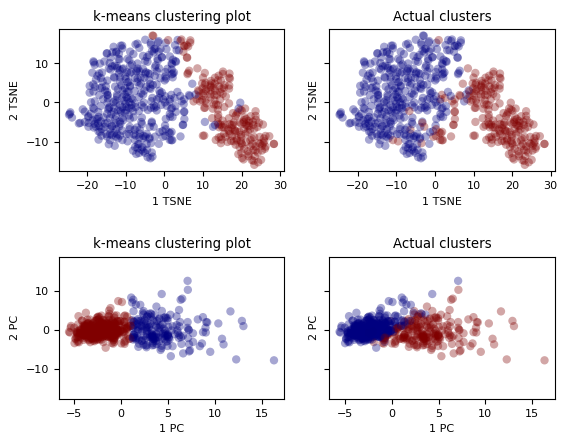

In [47]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
kY = kmeans.fit_predict(X)
kY_pca = kmeans.fit_predict(data_pca)

metrics(kY, kY_pca)

ploting(kY, kY_pca, 'k-means clustering plot')

Silhouette score (TSNE data): 0.33938477753669855
Silhouette score (PCA data): 0.5046397728338732
Adjusted Rand Index (TSNE data): 0.5750409366326297
Accuracy (TSNE data): 0.1195079086115993
Adjusted Rand Index (ARI) (PCA data): 0.6594271719206948
Accuracy Score (PCA data): 0.09314586994727592


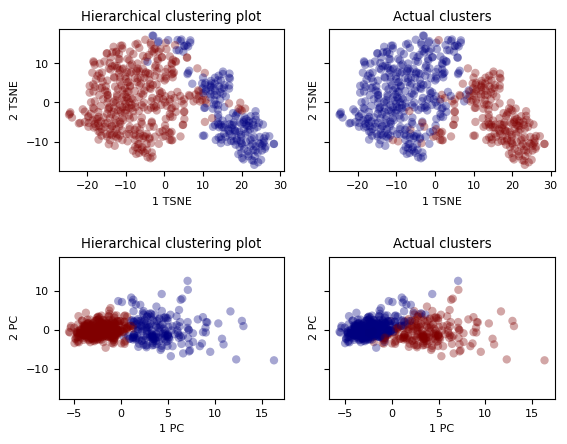

In [48]:
# Perform Agglomerative Clustering on the original data
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kY = aggC.fit_predict(X)

# Perform Agglomerative Clustering on the PCA-transformed data
kY_pca = aggC.fit_predict(data_pca)

metrics(kY, kY_pca)

# Plot the hierarchical clustering results
ploting(kY, kY_pca, 'Hierarchical clustering plot')

Number of clusters found: 2
Number of noise points: 224
Number of clusters found (PCA data): 8
Number of noise points (PCA data): 52
Silhouette score (TSNE data): -0.01679114751922626
Silhouette score (PCA data): -0.17559826696705846
Adjusted Rand Index (TSNE data): 0.20778783944349796
Accuracy (TSNE data): 0.4868189806678383
Adjusted Rand Index (ARI) (PCA data): 0.11823510362059313
Accuracy Score (PCA data): 0.5940246045694201


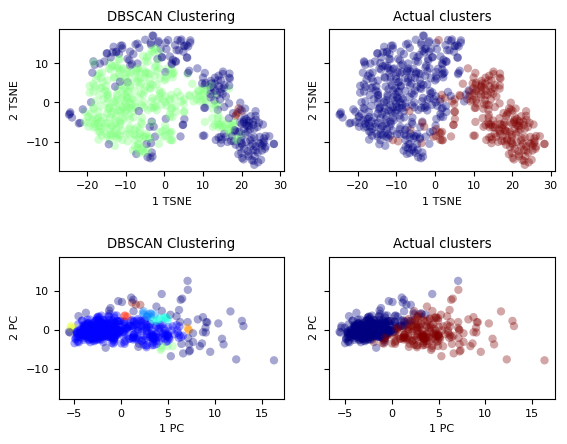

In [49]:
# Create the DBSCAN object
dbscan = DBSCAN(eps=2.5, min_samples=5)
# Apply DBSCAN to the data
labels = dbscan.fit_predict(X)
# Get the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
# Print results
print('Number of clusters found:', n_clusters)
print('Number of noise points:', n_noise)


# Create the DBSCAN object for PCA-transformed data
dbscan2 = DBSCAN(eps=0.7, min_samples=3)
# Apply DBSCAN to the PCA-transformed data
labels2 = dbscan2.fit_predict(data_pca)
# Get the number of clusters found for PCA-transformed data
n_clusters2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise2 = list(labels2).count(-1)
# Print results for PCA-transformed data
print('Number of clusters found (PCA data):', n_clusters2)
print('Number of noise points (PCA data):', n_noise2)


metrics(labels, labels2)

# Plot the clustering results
ploting(labels, labels2, 'DBSCAN Clustering')

#### <span style="color:darkblue"> Observations: </span>  

|                          | Silhouette Score | Adjusted Rand Index | Accuracy Score |
|--------------------------|------------------|---------------------|----------------|
| K-means (TSNE Data)      | 0.34             | 0.65                | 0.91           |
| K-means (PCA Data)       | 0.51             | 0.66                | 0.09           |
| Hierarchical Clustering (TSNE Data) | 0.34             | 0.58                | 0.12           |
| Hierarchical Clustering (PCA Data)  | 0.50             | 0.66                | 0.09           |
| DBSCAN (TSNE Data)       | -0.02            | 0.21                | 0.49           |
| DBSCAN (PCA Data)        | -0.18            | 0.12                | 0.59           |


The table provides an analysis of the performance of different clustering algorithms on two datasets: TSNE Data and PCA Data. The Silhouette Score, Adjusted Rand Index, and Accuracy Score were used to evaluate the quality of the clustering results.

The results indicate that the K-means algorithm performed better than Hierarchical Clustering and DBSCAN in terms of cluster separation. The Silhouette Scores for K-means were 0.34 for TSNE Data and 0.51 for PCA Data, indicating moderate cluster quality. While the accuracy score of 0.91 suggests that the K-means algorithm performed well in terms of correctly assigning data points to clusters, the moderate Silhouette Score implies that the clusters may not be well-separated or distinct. K-means with TSNE Data demonstrated a higher accuracy compared to other algorithms.

On the other hand, both Hierarchical Clustering showed lower Silhouette Scores, indicating less distinct and separated clusters. The Adjusted Rand Index values ranged from 0.58 to 0.66, indicating a moderate agreement between the clusters and the true labels. However, the Accuracy Scores for both data were low, ranging from 0.09 to 0.12, indicating a poor match between the clustering results and the ground truth labels.

The results of DBSCAN for both TSNE and PCA data indicate lower performance compared to other clustering methods. The negative Silhouette Scores (-0.02 for TSNE data and -0.18 for PCA data) suggest that the clusters are poorly defined and contain overlapping or noisy data points. Additionally, the Adjusted Rand Index values (0.21 for TSNE data and 0.12 for PCA data) indicate weak agreement between the DBSCAN clusters and the ground truth labels. The accuracy scores (0.49 for TSNE data and 0.59 for PCA data) further confirm the suboptimal performance of DBSCAN in accurately classifying the data points. These results suggest that DBSCAN may struggle to capture the underlying structure and separate the data into distinct clusters in this particular dataset.

### <span style="color:black"> Clustering models  </span> 
#### <span style="color:black">  K-Means </span> 

### <span style="color:black"> Classification models  </span> 
#### <span style="color:black">  k-nearest neighbors model predictor </span> 

0: Benign 
1: Malign
KNN precision:  0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.97      0.99      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



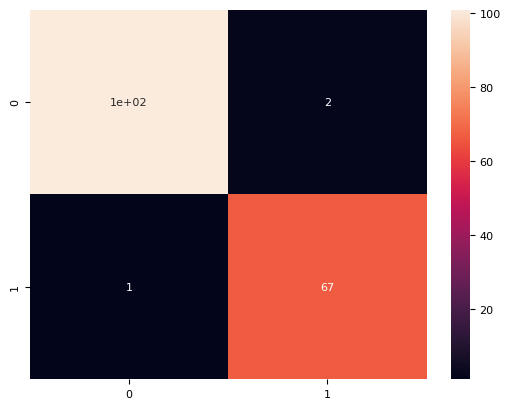

In [38]:
#KNN model predictor
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN = KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

#Evaluating predictor
print("0: Benign \n1: Malign", end='\n')
print("KNN precision: ", round(accuracy_score(y_test, y_pred), 2))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))


#### <span style="color:black"> Decision trees </span> 

0: Benign 
1: Malign
Tree score:  1.0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       103
           1       0.98      0.96      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



<Axes: >

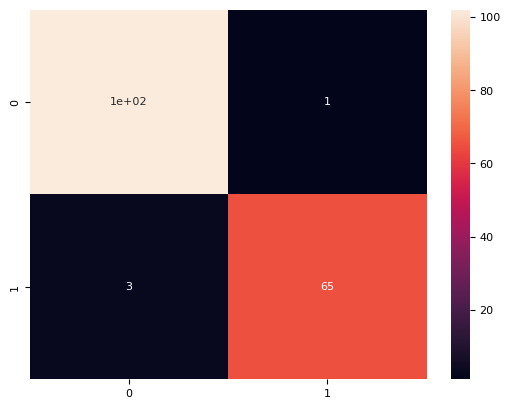

In [40]:
# Decision trees
tree = ExtraTreesClassifier(n_estimators=500, random_state=0)
tree.fit(X_train, y_train)
y_predic_tree = tree.predict(X_test)
print("0: Benign \n1: Malign", end='\n')
print("Tree score: ", tree.score(X_train, y_train)) #Good value so, continue
print(classification_report(y_test, y_predic_tree))
cm = confusion_matrix(y_test, y_predic_tree)
sns.heatmap(cm, annot=True)

#### <span style="color:black"> Gaussian Naive Bayes </span> 

0: Benign 
1: Malign
Naive Bayes score:  0.9590643274853801
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.98      0.91      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



<Axes: >

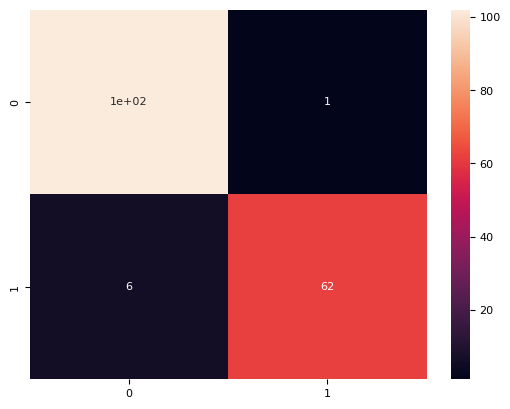

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predic_nb = nb.predict(X_test)
print("0: Benign \n1: Malign", end='\n')
print("Naive Bayes score: ",nb.score(X_test, y_test))
print(classification_report(y_test, y_predic_nb))
cm = confusion_matrix(y_test, y_predic_nb)
sns.heatmap(cm, annot=True)

<span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;">  The Naive Bayes model assumes that the features are conditionally independent and normally distributed. However, some features such as "area" and "perimeter" have a mathematical relationship with the "radius" value, and "concave points" does not have a Gaussian distribution. Thus, the Naive Bayes model yielded the worst score of 0.96 with 6 false negatives and 1 false positive. On the other hand, the decision tree model gave a score of 0.98 with 3 false negatives and 1 false positive, while the KNN model gave a score of 0.98 with 2 false positives and 1 false negative. The KNN model had the lowest number of false negative cases among the three methods.
For determining whether a cancer is malignant, all three models have a precision of 0.98. However, for benign diagnosis, the KNN model had the highest precision of 0.99, followed by the decision trees with 0.97 and the Naive Bayes model with 0.94. </p>
  <p style="text-align: justify;"> 
 A majority voting approach will be implemented to explore an alternative method for classifying malignant cases.</p>

#### <span style="color:black"> Majority voting </span> 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

0.9824561403508771


<Axes: >

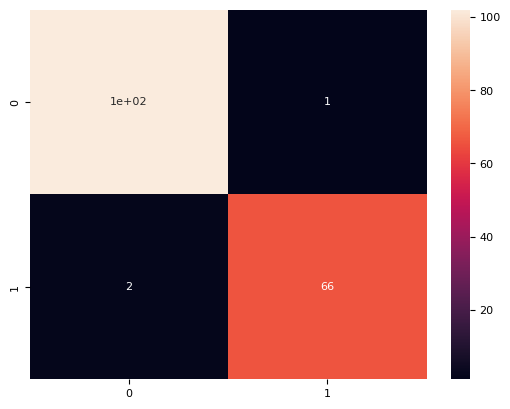

In [36]:
from sklearn.ensemble import VotingClassifier
clf1 = KNeighborsClassifier(n_neighbors = 3)
clf2 = ExtraTreesClassifier(n_estimators=500, random_state=0)

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2)], voting='soft')
voting_clf.fit(X_train, y_train)
y_predic_voting = voting_clf.predict(X_test)
print(classification_report(y_test, y_predic_voting))
# evaluate the voting classifier on test data
score = voting_clf.score(X_test, y_test)
print(score)
cm = confusion_matrix(y_test, y_predic_voting)
sns.heatmap(cm, annot=True)

 <span style="color:darkblue"> Observations: </span>  
 <p style="text-align: justify;"> The implementation of majority voting resulted in a better performance in classifying malignant cases, increasing the precision score from 0.98 to 0.99. The precision score for benign cases remained at 0.98. Therefore, the use of ensemble learning through majority voting improved the classification of both malignant and benign cases of breast cancer. </p>

### <span style="color:black"> Clustering vs Classification  </span> 

### <span style="color:black"> Conclusion </span> 

  <p style="text-align: justify;"> The mean values of cell radius, perimeter, area, compactness, concavity, and concave points can be utilized to classify breast cancer. A higher value of these features suggests malignant tumors. The availability of these features, which can be easily measured through various methods of medical imaging, can provide critical insights for early detection and treatment of breast cancer. This discovery can be especially valuable in resource-constrained settings where access to more advanced diagnostic tools is limited. The ability to identify malignancy based on readily available features can contribute to more efficient and effective patient management, ultimately leading to better patient outcomes.
However, when it comes to the distribution of texture, smoothness, symmetry, or fractal dimension values, there is no clear indication of a preference for one diagnosis over the other. </p>
  
<p style="text-align: justify;"> All of the models were able to classify the majority of cases with a precision of at least 94% in the classification task. However, the k-nearest neighbors model performed the best overall compared to the other models. By using ensemble learning with both KNN and decision tree models, it was possible to improve the precision of malignant tumor detection by 1%. </p>


<p style="text-align: justify;"> In summary, it was possible to identify the features that enable us to distinguish malignant tumors, as well as variables that exhibit similar behavior in both malignant and benign tumors. Furthermore, the k-nearest neighbors model was found to be effective for the classification of breast cancer. While there were minor differences in precision between the methods, with the best-performing method (k-nearest neighbors) outperforming the worst-performing method by less than 4%, this small improvement in performance can still be meaningful in the early detection and treatment of breast cancer. The performance of the k-nearest neighbors model in classifying malignant tumors can be further improved by employing an ensemble learning model.  </p>

<p style="text-align: justify;"> As the field of medical imaging continues to expand, there exist numerous prospects for future research to explore the potential of machine learning algorithms in analyzing more extensive and intricate medical imaging datasets. This paves the way for the discovery of new patterns and associations in medical data that were previously unrecognized, along with the enhancement of the accuracy of diagnoses and treatment decisions. Within the context of breast cancer, machine learning algorithms may be capable of identifying subtle imaging features that are not immediately apparent to human observers, which may lead to earlier and more precise diagnoses. Ultimately, sustained research efforts in this area may result in significant advancements in the diagnosis and treatment of breast cancer, and other medical conditions. </p>